In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../../'))
# import torchio
import numpy as np
import torch
from typing import Union 

from ext.lab2im import utils
from SynthSeg.brain_generator import BrainGenerator

In [89]:
output_labels = np.load('priors/output_labels_reorganized.npy',allow_pickle=True)
generation_labels = np.load('priors/generation_labels_reorganized.npy',allow_pickle=True)
classes_names = np.load('priors/classes_names_reorganized.npy',allow_pickle=True)
generation_classes = np.load('priors/generation_classes_reorganized.npy',allow_pickle=True)
# prior_means_t1 = np.load('priors/t1_mean_class_based.npy')
# prior_stds_t1 = np.load('priors/t1_std_class_based.npy')

# print("Length of generation_classes:", len(generation_classes))
# print("Length of generation_labels:", len(generation_labels))
# print("Length of classes_names:", len(classes_names))
# print("Length of output_labels:", len(output_labels))
# print("Shape of prior_means:", prior_means_t1.shape)
# print("Shape of prior_stds:", prior_stds_t1.shape)

# print (len(np.unique(generation_classes)))

# print("prior_means", prior_means_t1)
# print()
# print("prior_stds", prior_stds_t1)

df = pd.DataFrame({
    'Generation Label': generation_labels,
    'Generation Class': generation_classes,
    'Structure': classes_names,
    'output_labels': output_labels
})

display(df)
# Save DataFrame to CSV
# df.to_csv('priors/labels_mapping.csv', index=False)

Generation Label  Generation Class                         Structure  \
0                  0                 0                        background   
1                 14                 1                     3rd ventricle   
2                 15                 1                     4th ventricle   
3                 16                10                        brain-stem   
4                 24                 1                               CSF   
5                  2                 2        left cerebral white matter   
6                  3                 3              left cerebral cortex   
7                  4                 1            left lateral ventricle   
8                  5                 1   left inferior lateral ventricle   
9                  7                 4      left cerebellum white matter   
10                 8                 5            left cerebellum cortex   
11                10                 6                     left thalamus   
12                11                 7                      left caudate   
13                12                 8                      left putamen   
14                13                 9                     left pallidum   
15                17                11                  left hippocampus   
16                18                12                     left amygdala   
17                26                13               left accumbens area   
18                28                14                   left ventral DC   
19                41                 2       right cerebral white matter   
20                42                 3             right cerebral cortex   
21                43                 1           right lateral ventricle   
22                44                 1  right inferior lateral ventricle   
23                46                 4     right cerebellum white matter   
24                47                 5           right cerebellum cortex   
25                49                 6                    right thalamus   
26                50                 7                     right caudate   
27                51                 8                     right putamen   
28                52                 9                    right pallidum   
29                53                11                 right hippocampus   
30                54                12                    right amygdala   
31                58                13              right accumbens area   
32                60                14                  right ventral DC   

    output_labels  
0               0  
1              14  
2              15  
3              16  
4              24  
5               2  
6               3  
7               4  
8               5  
9               7  
10              8  
11             10  
12             11  
13             12  
14             13  
15             17  
16             18  
17             26  
18             28  
19             41  
20             42  
21             43  
22             44  
23             46  
24             47  
25             49  
26             50  
27             51  
28             52  
29             53  
30             54  
31             58  
32             60

In [90]:
df_prior = pd.read_csv('labels_relaxometry_priors.csv')
# Extract arrays from dataframe with upper/lower limits as rows
# t1_mean = np.array([df_prior['t1_mean_upper'].values, df_prior['t1_mean_lower'].values])
# t1_std = np.array([df_prior['t1_std_upper'].values, df_prior['t1_std_lower'].values])
# t2_mean = np.array([df_prior['t2_mean_upper'].values, df_prior['t2_mean_lower'].values]) 
# t2_std = np.array([df_prior['t2_std_upper'].values, df_prior['t2_std_lower'].values])
# pd_mean = np.array([df_prior['pd_mean_upper'].values, df_prior['pd_mean_lower'].values])
# pd_std = np.array([df_prior['pd_std_upper'].values, df_prior['pd_std_lower'].values])

display(df_prior)

Generation Class               Class name  t1_mean_upper  t1_mean_lower  \
0                  0               background              0              0   
1                  1                      CSF           5500           3800   
2                  2    cerebral white matter            900            750   
3                  3          cerebral cortex           1500           1250   
4                  4  cerebellar white matter            900            750   
5                  5        cerebellar cortex           1500           1250   
6                  6                 thalamus           1080           1060   
7                  7                  caudate           1450           1250   
8                  8                  putamen           1310           1100   
9                  9                 pallidum           1050            840   
10                10                brainstem            900            750   
11                11              hippocampus           1500           1300   
12                12                 amygdala           1400           1200   
13                13         accumbens (gray)           1500           1250   
14                14               ventral DC           1500           1250   

    t1_std_upper  t1_std_lower  t2_mean_upper  t2_mean_lower  t2_std_upper  \
0              0             0              0              0             0   
1            400           200           2000           1000            50   
2             20            10             85             75             5   
3            100            30            135             95             7   
4             20            10             85             75             5   
5            100            30            135             95             7   
6             70            40             72             60             3   
7             90            70             75             60             7   
8             70            30             63             57             5   
9             70            30            135             95             7   
10            20            10             85             75             5   
11            70            50            130            110             9   
12           200            50            100             95            10   
13           100            30            135             95             7   
14           100            30            135             95             7   

    t2_std_lower  pd_mean_upper  pd_mean_lower  pd_std_upper  pd_std_lower  
0              0              0              0             0             0  
1             30             98             95             2             0  
2              0             68             65             5             3  
3              2             85             80             5             1  
4              0             68             65             5             3  
5              2             85             80             5             1  
6              0             76             75             5             1  
7              2             82             79             5             1  
8              2             82             79             5             1  
9              2             85             80             5             1  
10             0             68             65             5             3  
11             3             83             81             2             1  
12             5             85             80             5             1  
13             2             85             80             5             1  
14             2             85             80             5             1

In [91]:
path_label_map = r'/mnt/hdd0/download/oasis-1/brain_segmentations/OAS1_0001_synthseg.nii.gz'
label_map = nib.load(path_label_map)
label_map_data = label_map.get_fdata()
# Check if unique values in label map match generation labels
unique_labels = np.unique(label_map_data)
# print("Unique values in label map:", unique_labels)
# print("Generation labels:", df['Generation Label'].values)
assert np.all(np.isin(unique_labels, df['Generation Label'].values)), "Label map contains values not found in generation labels"

In [92]:
def generate_gaussian_distribution(mean_bounds, std_bounds, size=1, device='cpu'):
    """
    Generate gaussian distribution by sampling mean and std from uniform distributions defined by bounds
    
    Args:
        mean_bounds (tuple/list/array): Upper and lower bounds for mean [upper, lower]
        std_bounds (tuple/list/array): Upper and lower bounds for std [upper, lower] 
        size (int): Number of samples to generate
        device (str): PyTorch device to use ('cpu' or 'cuda')
        
    Returns:
        torch.Tensor: Samples from generated gaussian distribution
    """
    # Sample mean and std from uniform distributions
    mean = torch.FloatTensor(1).uniform_(mean_bounds[1], mean_bounds[0]).to(device)
    std = torch.FloatTensor(1).uniform_(std_bounds[1], std_bounds[0]).to(device)
    
    # Generate normal distribution
    dist = torch.distributions.Normal(mean, std)
    
    # Sample from distribution
    samples = dist.sample((size,))
    
    return samples


In [93]:
# Example usage for CSF T1 values
csf_t1_mean_bounds = [df_prior.loc[1, 't1_mean_upper'], df_prior.loc[1, 't1_mean_lower']]  # [5500, 3800]
csf_t1_std_bounds = [df_prior.loc[1, 't1_std_upper'], df_prior.loc[1, 't1_std_lower']]    # [400, 200]

csf_t1_samples = generate_gaussian_distribution(
    mean_bounds=csf_t1_mean_bounds,
    std_bounds=csf_t1_std_bounds,
    size=1000  # Generate 1000 samples
)

print(f"Generated {len(csf_t1_samples)} T1 samples for CSF")
print(f"Sample mean: {csf_t1_samples.mean():.2f}")
print(f"Sample std: {csf_t1_samples.std():.2f}")
print(f"Sample min: {csf_t1_samples.min():.2f}")
print(f"Sample max: {csf_t1_samples.max():.2f}")


Generated 1000 T1 samples for CSF
Sample mean: 5124.07
Sample std: 299.72
Sample min: 4261.16
Sample max: 6017.32


In [94]:
# Create mapping dictionary from generation label to generation class
label_to_class = dict(zip(df['Generation Label'], df['Generation Class']))

# Create output array same size as input
class_mapped_data = np.zeros_like(label_map_data)

# Map values using dictionary
for label, class_num in label_to_class.items():
    class_mapped_data[label_map_data == label] = class_num

# Create new nifti image with mapped values
# mapped_nifti = nib.Nifti1Image(class_mapped_data, label_map.affine)
# Plot a central slice of the mapped nifti


In [95]:
def generate_relaxometry_maps(class_mapped_data, df_prior, verbose=False):
    # Get unique classes and count voxels per class
    unique_classes = torch.unique(torch.from_numpy(class_mapped_data))
    voxel_counts = {c.item(): torch.sum(torch.from_numpy(class_mapped_data) == c).item() for c in unique_classes}

    # Initialize output arrays for T1, T2 and PD values
    t1_map = torch.zeros_like(torch.from_numpy(class_mapped_data), dtype=torch.float32)
    t2_map = torch.zeros_like(torch.from_numpy(class_mapped_data), dtype=torch.float32)
    pd_map = torch.zeros_like(torch.from_numpy(class_mapped_data), dtype=torch.float32)

    # Generate and assign T1, T2 and PD values for each class
    for class_num in unique_classes:
        # Skip background class (0)
        if class_num == 0:
            continue
            
        # Get number of voxels for this class
        n_voxels = voxel_counts[class_num.item()]
        
        # Get T1 bounds for this class from prior dataframe
        t1_mean_bounds = [df_prior.loc[class_num.item(), 't1_mean_upper'], 
                         df_prior.loc[class_num.item(), 't1_mean_lower']]
        t1_std_bounds = [df_prior.loc[class_num.item(), 't1_std_upper'],
                        df_prior.loc[class_num.item(), 't1_std_lower']]
        
        # Get T2 bounds for this class from prior dataframe
        t2_mean_bounds = [df_prior.loc[class_num.item(), 't2_mean_upper'],
                         df_prior.loc[class_num.item(), 't2_mean_lower']]
        t2_std_bounds = [df_prior.loc[class_num.item(), 't2_std_upper'],
                        df_prior.loc[class_num.item(), 't2_std_lower']]
        
        # Get PD bounds for this class from prior dataframe
        pd_mean_bounds = [df_prior.loc[class_num.item(), 'pd_mean_upper'],
                         df_prior.loc[class_num.item(), 'pd_mean_lower']]
        pd_std_bounds = [df_prior.loc[class_num.item(), 'pd_std_upper'],
                        df_prior.loc[class_num.item(), 'pd_std_lower']]
        
        # Generate samples for this class
        t1_samples = generate_gaussian_distribution(
            mean_bounds=t1_mean_bounds,
            std_bounds=t1_std_bounds,
            size=n_voxels
        )
        
        t2_samples = generate_gaussian_distribution(
            mean_bounds=t2_mean_bounds,
            std_bounds=t2_std_bounds,
            size=n_voxels
        )
        
        pd_samples = generate_gaussian_distribution(
            mean_bounds=pd_mean_bounds,
            std_bounds=pd_std_bounds,
            size=n_voxels
        )
        
        # Assign generated values to voxels of this class
        t1_map[torch.from_numpy(class_mapped_data) == class_num] = t1_samples.squeeze()
        t2_map[torch.from_numpy(class_mapped_data) == class_num] = t2_samples.squeeze()
        pd_map[torch.from_numpy(class_mapped_data) == class_num] = pd_samples.squeeze()

    # Print statistics
    if verbose:
        print("T1 map generated with following statistics:")
        for class_num in unique_classes:
            class_values = t1_map[torch.from_numpy(class_mapped_data) == class_num]
        print(f"\nClass {class_num.item()}:")
        print(f"Number of voxels: {len(class_values)}")
        print(f"Mean: {torch.mean(class_values).item():.2f}")
        print(f"Std: {torch.std(class_values).item():.2f}")

        print("\nT2 map generated with following statistics:")
        for class_num in unique_classes:
            class_values = t2_map[torch.from_numpy(class_mapped_data) == class_num]
            print(f"\nClass {class_num.item()}:")
            print(f"Number of voxels: {len(class_values)}")
            print(f"Mean: {torch.mean(class_values).item():.2f}")
            print(f"Std: {torch.std(class_values).item():.2f}")

        print("\nPD map generated with following statistics:")
        for class_num in unique_classes:
            class_values = pd_map[torch.from_numpy(class_mapped_data) == class_num]
            print(f"\nClass {class_num.item()}:")
            print(f"Number of voxels: {len(class_values)}")
            print(f"Mean: {torch.mean(class_values).item():.2f}")
            print(f"Std: {torch.std(class_values).item():.2f}")

    # Stack maps into 4D tensor
    relaxometry_maps = torch.stack([t1_map, t2_map, pd_map], dim=0)
    
    return relaxometry_maps


In [96]:
def plot_relaxometry_map(map,title,colorbar_label_name):
    # Create figure with 3 subplots for orthogonal views
    plt.figure(figsize=(15, 5))

    # Get middle slices for each dimension
    slice_x = map.shape[0] // 2
    slice_y = map.shape[1] // 2 
    slice_z = map.shape[2] // 2

    # Plot sagittal view (YZ plane)
    plt.subplot(131)
    plt.imshow(np.flipud(map[slice_x, :, :].T.numpy()), cmap='gray')
    plt.title('Sagittal View')
    plt.axis('off')
    # plt.colorbar(label='T1 (ms)')

    # Plot coronal view (XZ plane) 
    plt.subplot(132)
    plt.imshow(np.flipud(map[:, slice_y, :].T.numpy()), cmap='gray')
    plt.title('Coronal View')
    plt.axis('off')
    # plt.colorbar(label='T1 (ms)')

    # Plot axial view (XY plane)
    plt.subplot(133)
    plt.imshow(map[:, :, slice_z].numpy(), cmap='gray')
    plt.title('Axial View')
    plt.axis('off')
    plt.colorbar(label=colorbar_label_name)

    plt.suptitle(title, x=0.04, y=1.0, fontsize=16, horizontalalignment='left')
    plt.tight_layout()
    plt.show()


In [97]:
relaxometry_maps = generate_relaxometry_maps(class_mapped_data,df_prior,verbose=False)
relaxometry_maps.shape

torch.Size([3, 176, 208, 176])

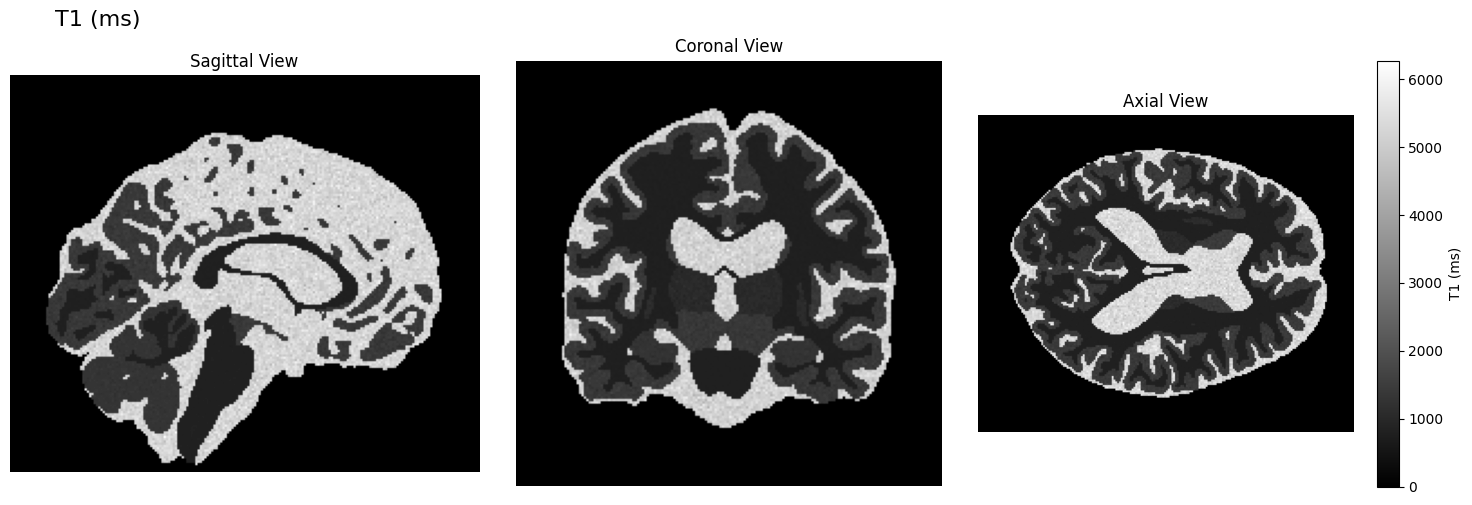

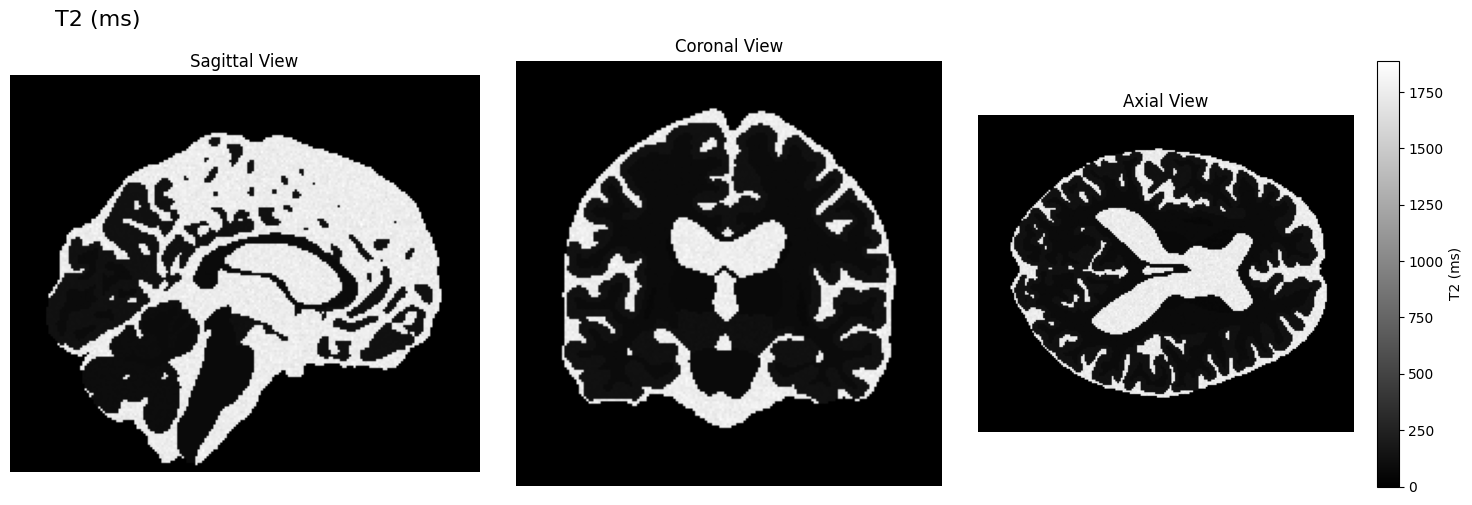

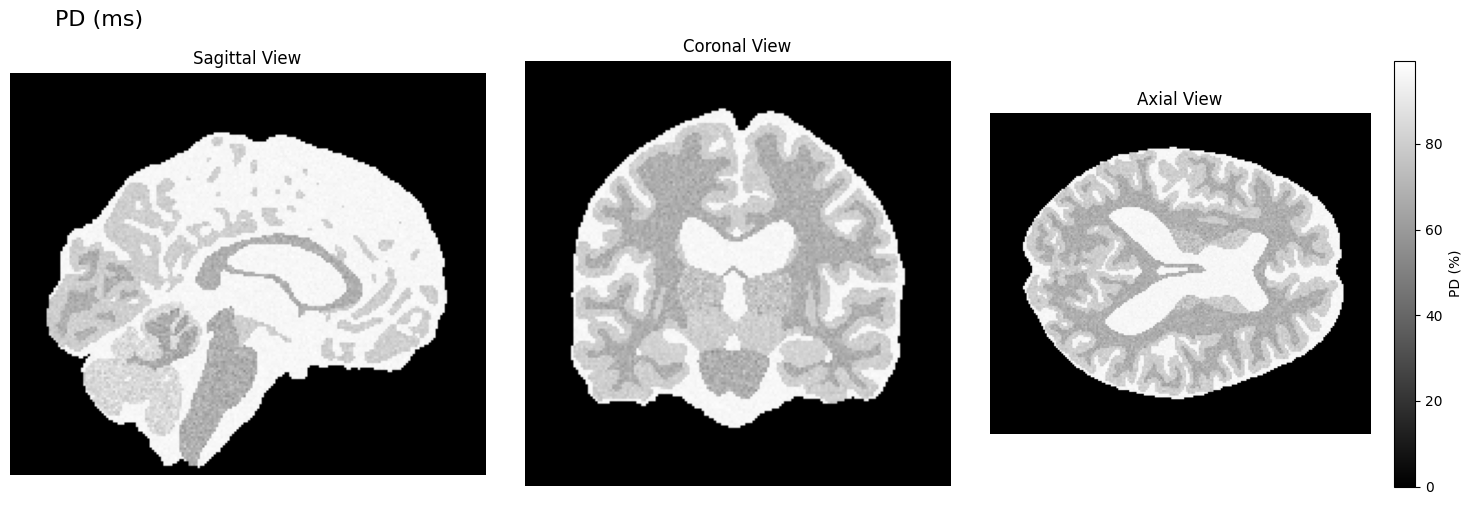

In [98]:
plot_relaxometry_map(relaxometry_maps[0],"T1 (ms)","T1 (ms)")
plot_relaxometry_map(relaxometry_maps[1],"T2 (ms)","T2 (ms)")
plot_relaxometry_map(relaxometry_maps[2],"PD (ms)","PD (%)")

In [ ]:
# Create mapping dictionary from generation label to generation class
label_to_class = dict(zip(df['Generation Label'], df['Generation Class']))

# Create output array same size as input
class_mapped_data = np.zeros_like(label_map_data)

# Map values using dictionary
for label, class_num in label_to_class.items():
    class_mapped_data[label_map_data == label] = class_num

# Create new nifti image with mapped values
# mapped_nifti = nib.Nifti1Image(class_mapped_data, label_map.affine)
# Plot a central slice of the mapped nifti


# IR-SPGR Signal Equation

The following cell implements this equation for the general imaging signal:

$$S = A \cdot \text{PD} \cdot \exp\left(-\frac{\text{TE}}{T_2}\right) \cdot \frac{1 - (1-\cos(\theta B_1))\exp\left(-\frac{\text{TI}}{T_1}\right) - \cos(\theta B_1)\exp\left(-\frac{\text{TR}}{T_1}\right)}{1 - \cos(\alpha B_1)\cos(\theta B_1)\exp\left(-\frac{\text{TR}}{T_1}\right)}$$

Where:

* **S** = Signal intensity
* **A** = Overall scaling factor
* **PD** = Proton density
* **TE** = Echo time
* **T2** = $T_2$ relaxation time
* **TI** = Inversion time
* **T1** = $T_1$ relaxation time
* **TR** = Repetition time
* **B1** = $B_1$ inhomogeneity factor
* **$\theta$** = Inversion pulse flip angle
* **$\alpha$** = Excitation pulse flip angle


In [99]:

def calculate_ir_signal(
    A: float,
    PD: Union[np.ndarray, float], # Use Union for older Python
    TE: float,
    T2: Union[np.ndarray, float], # Use Union for older Python
    TI: float,
    T1: Union[np.ndarray, float], # Use Union for older Python
    TR: float,
    B1: Union[np.ndarray, float], # Use Union for older Python
    theta: float, # Inversion pulse nominal angle (in radians)
    alpha: float, # Excitation pulse nominal angle (in radians)
    epsilon: float = 1e-9 # Small value to prevent potential division by zero
) -> Union[np.ndarray, float]: # Use Union for older Python
   
    # Calculate angles affected by B1 inhomogeneity
    actual_theta = B1 * theta
    actual_alpha = B1 * alpha

    # Calculate exponential terms 
    # Adding epsilon prevents immediate division by zero if T1/T2 is exactly 0,
    # but negative T1/T2 can still cause issues (exp(positive) -> inf).
    E1 = np.exp(-TR / (T1 + epsilon))
    if TI == 0:
        E_TI = 0
    else:
        E_TI = np.exp(-TI / (T1 + epsilon))
    E2 = np.exp(-TE / (T2 + epsilon))

    # Calculate numerator and denominator
    cos_actual_theta = np.cos(actual_theta)
    numerator = 1.0 - (1.0 - cos_actual_theta) * E_TI - cos_actual_theta * E1

    cos_actual_alpha = np.cos(actual_alpha)
    denominator = 1.0 - cos_actual_alpha * cos_actual_theta * E1
    
    # --- NO MASKING - Direct Calculation ---
    # Note: If denominator is zero or near-zero, this will result in inf or NaN.
    # If T1 or T2 were negative, E1, E_TI or E2 might be inf, also leading to inf/NaN.
    signal = A * PD * E2 * (numerator / (denominator + epsilon)) # Add epsilon to final denom too

    return signal

In [100]:
T1map = relaxometry_maps[0]
T2map = relaxometry_maps[1]
PDmap = relaxometry_maps[2]
#simulate T1w image

T1_params = {
    'T1': T1map,
    'T2': T2map,
    'PD': PDmap,
    'A': 1.0,         # Scaling factor
    'TE': 2.604,       # Echo Time (ms)
    'TI': 1000.0,     # Inversion Time (ms)
    'TR': 2507.47,     # Repetition Time (ms)
    'B1': 1.0,        # Assume ideal B1 field
    'theta': np.pi,   # Ideal 180-degree inversion pulse
    'alpha': np.pi/2, # flip angle is 10 degrees
}

#simulate T2 image

T2_params = {
    'T1': T1map,
    'T2': T2map,
    'PD': PDmap,
    'A': 1.0,         # Scaling factor
    'TE': 97.084,       # Echo Time (ms)
    'TI': 0.0,     # Inversion Time (ms)
    'TR': 4890,     # Repetition Time (ms)
    'B1': 1.0,        # Assume ideal B1 field
    'theta': np.pi,   # Ideal 180-degree inversion pulse
    'alpha': np.pi*(180/115), # flip angle is 90 degrees
    # 'epsilon': 0
}

#simulate T2 FLAIR FSat image

FLAIR_params = {
    'T1': T1map,
    'T2': T2map,
    'PD': PDmap,
    'A': 1.0,         # Scaling factor
    'TE': 97.084,       # Echo Time (ms)
    'TI': 2200,     # Inversion Time (ms)
    'TR': 4890,     # Repetition Time (ms)
    'B1': 1.0,        # Assume ideal B1 field
    'theta': np.pi,   # Ideal 180-degree inversion pulse
    'alpha': np.pi/2, # flip angle is 90 degrees
}


# Calculate synthetic images
sT1w = calculate_ir_signal(**T1_params)
sT2w = calculate_ir_signal(**T2_params) 
sFLAIR = calculate_ir_signal(**FLAIR_params)
# Normalize each synthetic image to range [0,1]
sT1w = (sT1w - torch.min(sT1w)) / (torch.max(sT1w) - torch.min(sT1w))
sT2w = (sT2w - torch.min(sT2w)) / (torch.max(sT2w) - torch.min(sT2w))
sFLAIR = (sFLAIR - torch.min(sFLAIR)) / (torch.max(sFLAIR) - torch.min(sFLAIR))

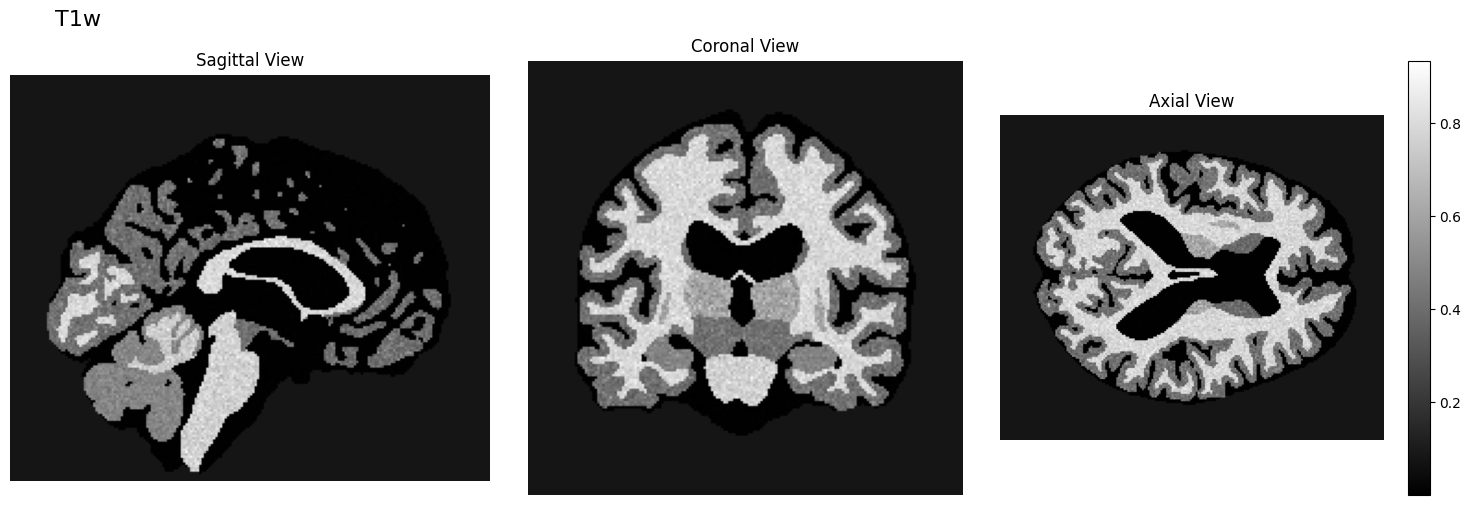

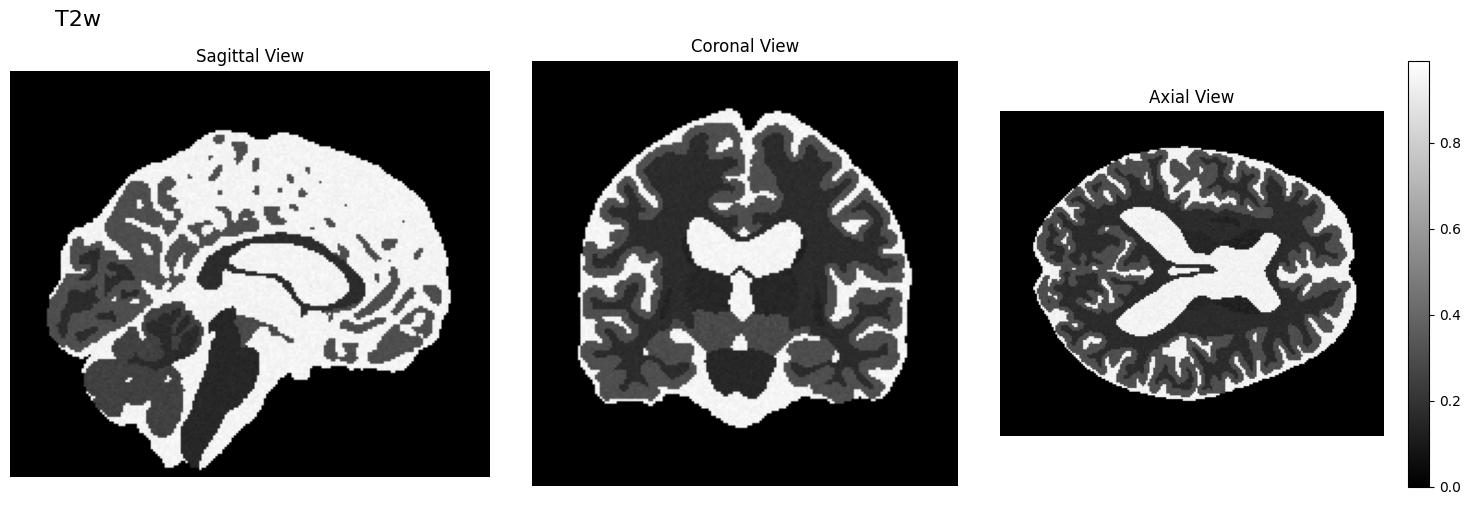

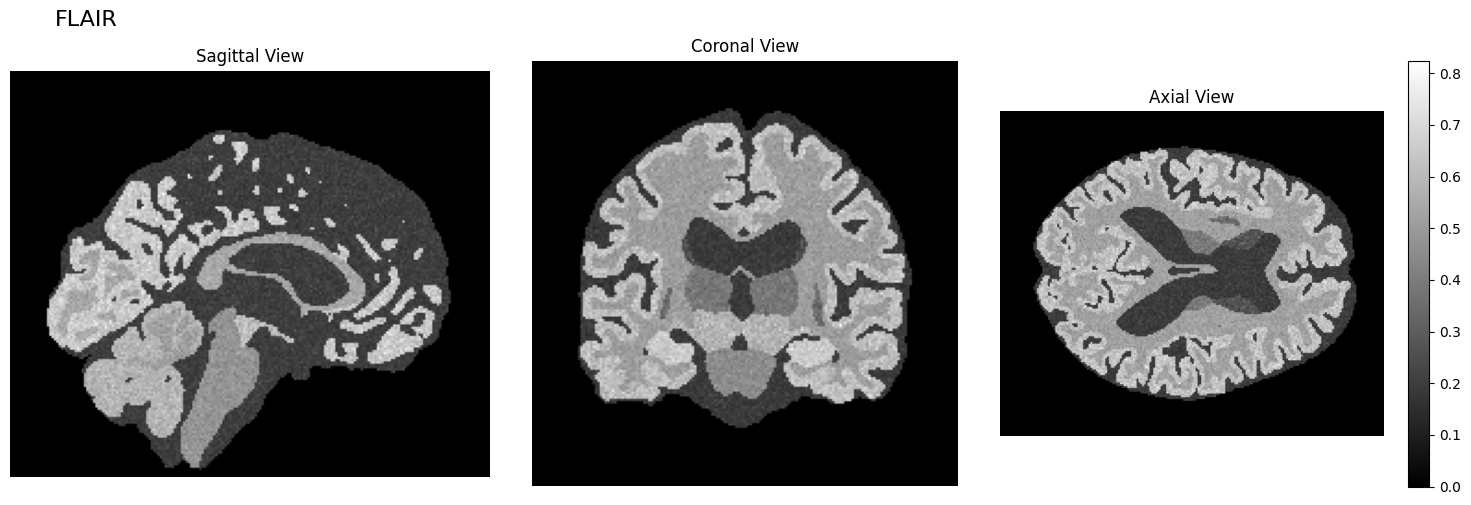

In [102]:
plot_relaxometry_map(sT1w,"T1w","")
plot_relaxometry_map(sT2w,"T2w","")
plot_relaxometry_map(sFLAIR,"FLAIR","")


testing variation

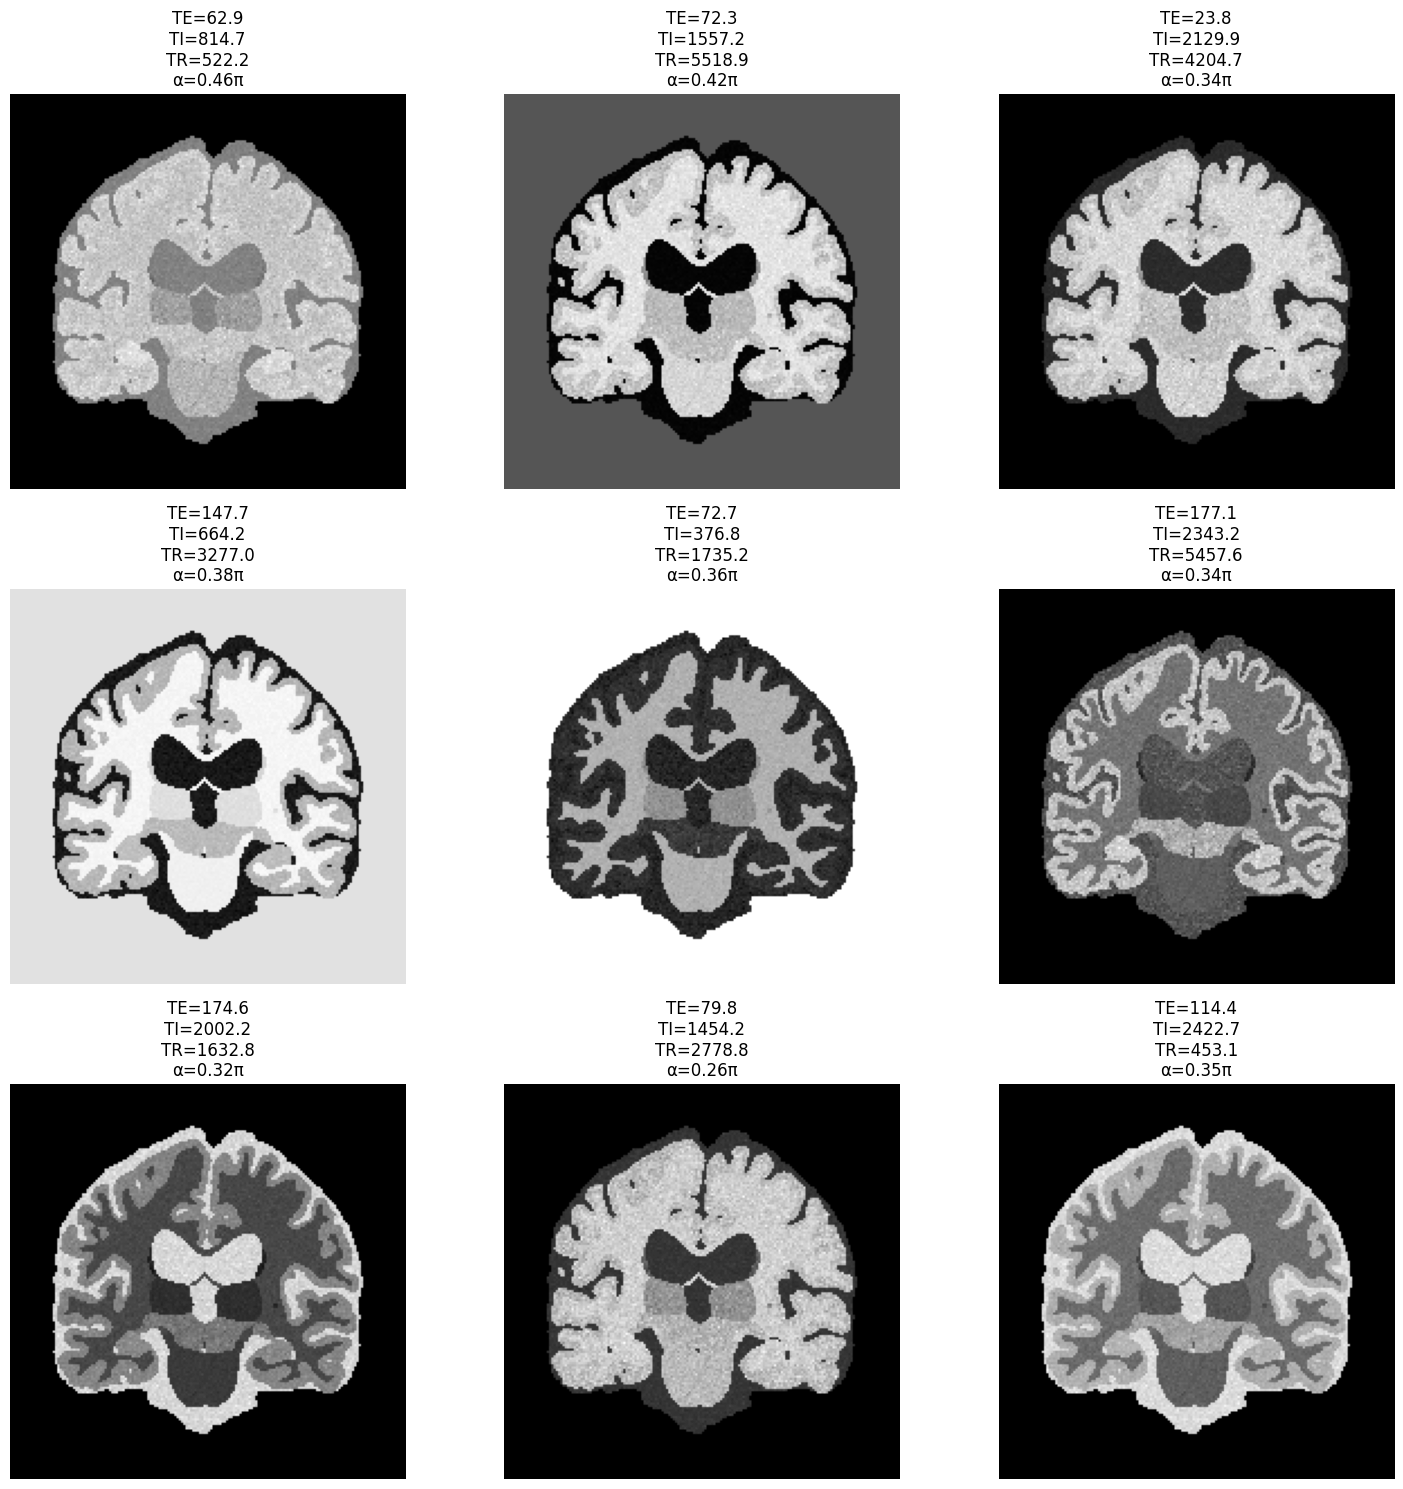

In [105]:
# Create figure with 9 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

# Base parameters
base_params = FLAIR_params.copy()

# Parameter ranges for random sampling
param_ranges = {
    'TE': (0, 200),    # Echo time range in ms
    'TI': (0, 2600), # Inversion time range in ms  
    'TR': (0, 6000), # Repetition time range in ms
    'alpha': (np.pi/4, np.pi/2) # Flip angle range in radians
}

# Generate 9 random parameter combinations
for i in range(9):
    # Randomly sample parameters
    params = base_params.copy()
    params['TE'] = float(torch.empty(1).uniform_(*param_ranges['TE']))
    params['TI'] = float(torch.empty(1).uniform_(*param_ranges['TI'])) 
    params['TR'] = float(torch.empty(1).uniform_(*param_ranges['TR']))
    params['alpha'] = float(torch.empty(1).uniform_(*param_ranges['alpha']))
    
    # Calculate synthetic image
    synth_img = calculate_ir_signal(**params)
    
    # Normalize image
    synth_img = (synth_img - torch.min(synth_img)) / (torch.max(synth_img) - torch.min(synth_img))
    
    # Plot image - convert tensor to numpy for plotting
    axes[i].imshow(torch.flip(synth_img[:,100,:], [1]).T.cpu().numpy(), cmap='gray')
    axes[i].set_title(f'TE={params["TE"]:.1f}\nTI={params["TI"]:.1f}\nTR={params["TR"]:.1f}\nα={params["alpha"]/np.pi:.2f}π')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
# Save the figure
# plt.savefig('images/flair_parameter_variations.png', bbox_inches='tight', dpi=300)sT2w


# Equations for Lorentzian and Gaussian Functions

The Lorentzian function is given by:

$$ L(x) = \frac{1}{\pi} \frac{\gamma}{(x-x_0)^2 + \gamma^2} $$

where:
- $x_0$ is the peak center
- $\gamma$ is the half-width at half-maximum (HWHM)

The Gaussian function is given by:

$$ G(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

where:
- $\mu$ is the mean (peak center)
- $\sigma$ is the standard deviation
- $\sigma^2$ is the variance


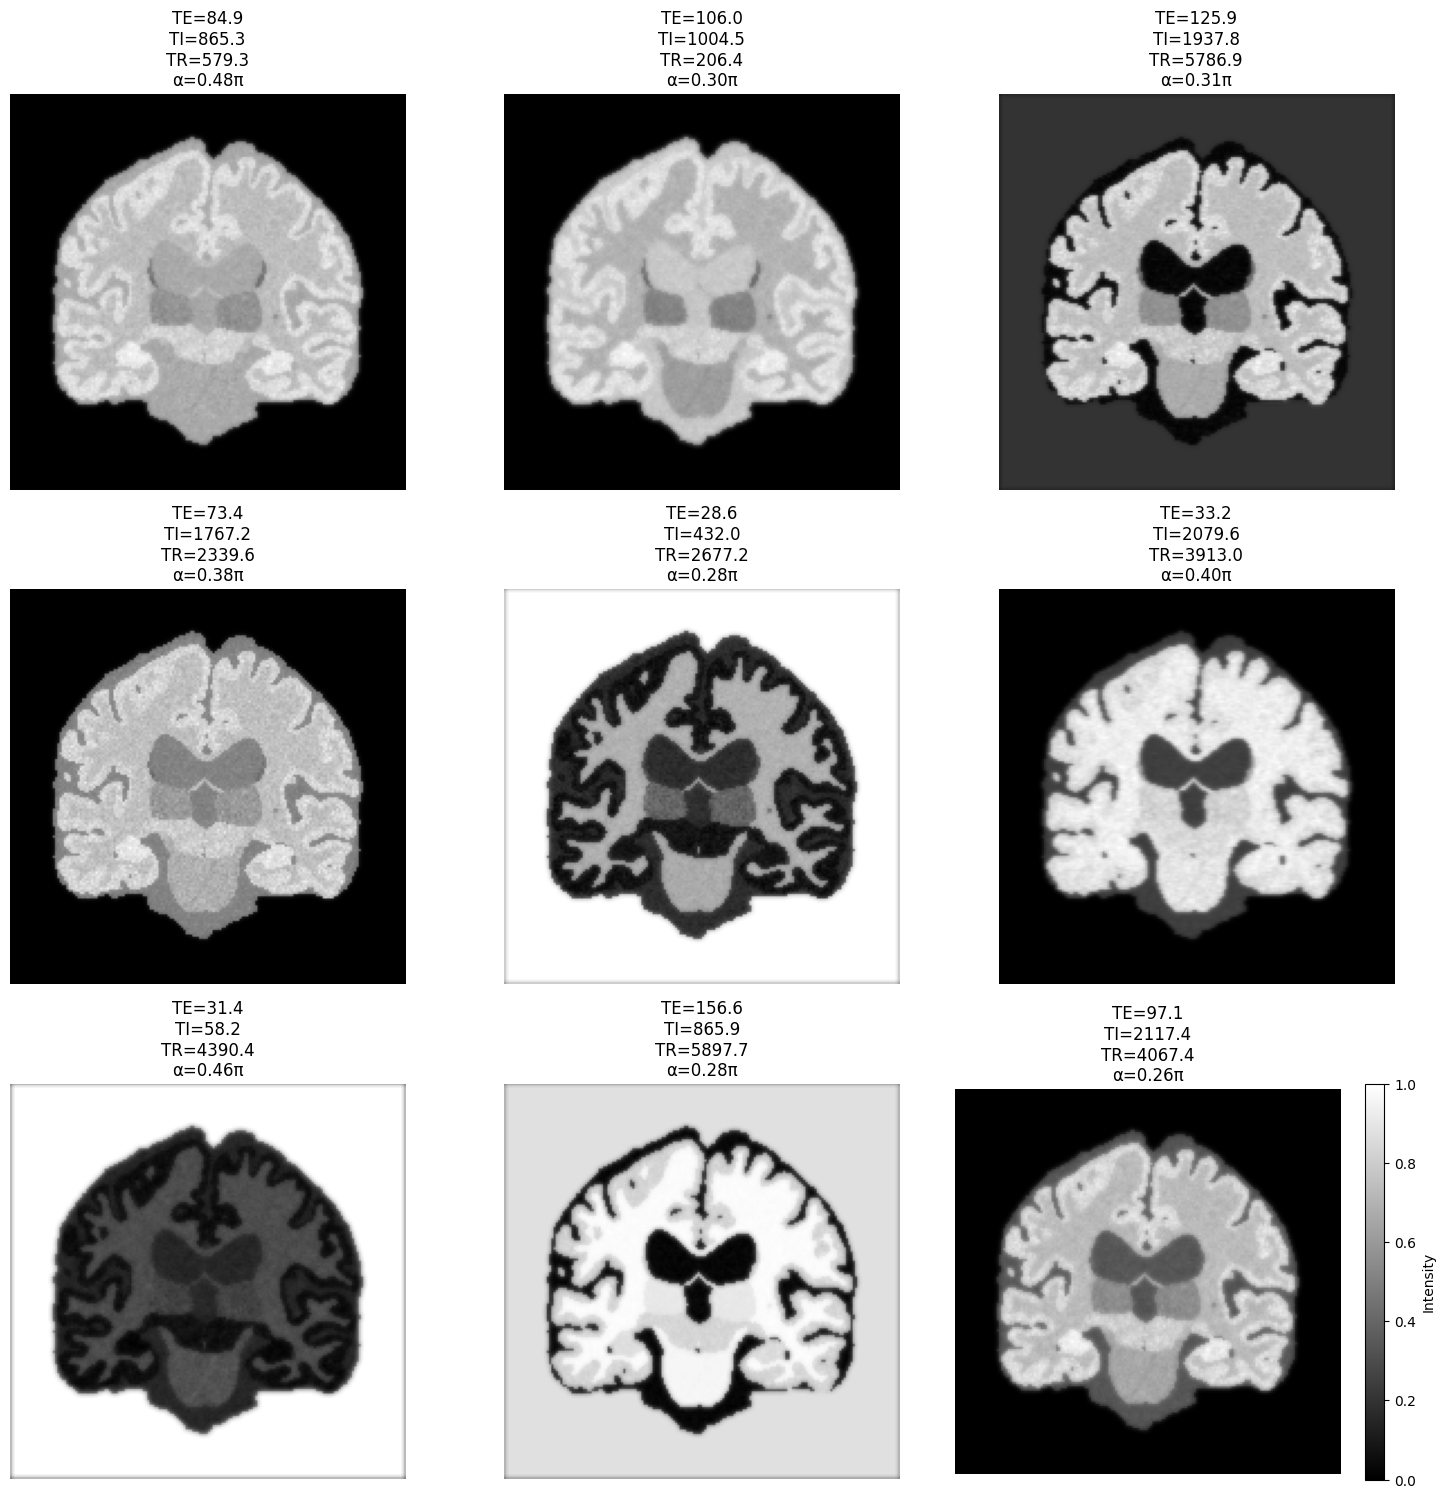

In [107]:
# Create figure with 9 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

# Base parameters
base_params = FLAIR_params.copy()

# Parameter ranges for random sampling
param_ranges = {
    'TE': (0, 200),    # Echo time range in ms
    'TI': (0, 2600), # Inversion time range in ms  
    'TR': (0, 6000), # Repetition time range in ms
    'alpha': (np.pi/4, np.pi/2) # Flip angle range in radians
}

# Generate 9 random parameter combinations
for i in range(9):
    # Randomly sample parameters
    params = base_params.copy()
    params['TE'] = float(torch.empty(1).uniform_(*param_ranges['TE']))
    params['TI'] = float(torch.empty(1).uniform_(*param_ranges['TI'])) 
    params['TR'] = float(torch.empty(1).uniform_(*param_ranges['TR']))
    params['alpha'] = float(torch.empty(1).uniform_(*param_ranges['alpha']))
    
    # Calculate synthetic image
    synth_img = calculate_ir_signal(**params)
    
    # Normalize image
    synth_img = (synth_img - torch.min(synth_img)) / (torch.max(synth_img) - torch.min(synth_img))
    
    # Get 2D slice and flip
    img_slice = torch.flip(synth_img[:,100,:], [1]).T
    
    # Create Gaussian kernel
    base_sigma = torch.empty(1).uniform_(0.2, 0.5).item()
    anisotropy_xy = torch.empty(1).uniform_(0.5, 1.5).item()
    sigma = (base_sigma, base_sigma * anisotropy_xy)
    
    # Create 2D Gaussian kernel
    kernel_size = 5
    x = torch.arange(-(kernel_size//2), kernel_size//2 + 1).float()
    y = torch.arange(-(kernel_size//2), kernel_size//2 + 1).float()
    xx, yy = torch.meshgrid(x, y, indexing='ij')
    gaussian_kernel = torch.exp(-(xx**2/(2*sigma[0]**2) + yy**2/(2*sigma[1]**2)))
    gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()
    
    # Create Lorentzian kernel
    gamma = torch.empty(1).uniform_(0.2, 0.5).item()
    lorentzian_kernel = 1 / (1 + (xx**2 + yy**2)/(gamma**2))
    lorentzian_kernel = lorentzian_kernel / lorentzian_kernel.sum()
    
    # Combine kernels through convolution
    combined_kernel = torch.nn.functional.conv2d(
        gaussian_kernel.unsqueeze(0).unsqueeze(0),
        lorentzian_kernel.unsqueeze(0).unsqueeze(0),
        padding=kernel_size//2
    ).squeeze()
    combined_kernel = combined_kernel / combined_kernel.sum()
    
    # Apply combined kernel
    img_slice = img_slice.unsqueeze(0).unsqueeze(0)
    filtered_img = torch.nn.functional.conv2d(
        img_slice, 
        combined_kernel.unsqueeze(0).unsqueeze(0),
        padding=kernel_size//2
    ).squeeze()
    
    # Renormalize
    filtered_img = (filtered_img - filtered_img.min()) / (filtered_img.max() - filtered_img.min())
    
    # Plot filtered image
    axes[i].imshow(filtered_img.cpu().numpy(), cmap='gray')
    axes[i].set_title(f'TE={params["TE"]:.1f}\nTI={params["TI"]:.1f}\nTR={params["TR"]:.1f}\nα={params["alpha"]/np.pi:.2f}π')
    axes[i].axis('off')

plt.tight_layout()
plt.colorbar(axes[i].imshow(filtered_img.cpu().numpy(), cmap='gray'), ax=axes[i], label='Intensity')
plt.show()
# Save the figure
# plt.savefig('images/flair_parameter_variations.png', bbox_inches='tight', dpi=300)sT2w

# Example of Phantom Eurospin TO4

In [109]:
# Load synthetic phantom data
phantom_data = nib.load('synthetic_phantom.nii.gz').get_fdata()


In [110]:
unique_values = np.unique(phantom_data)
print("Unique values in phantom data:", unique_values)

Unique values in phantom data: [0. 1.]


In [114]:
#using pytorch, create a tensor from the phantom data
phantom_tensor = torch.from_numpy(phantom_data)
print("Tensor shape:", phantom_tensor.shape)
# print("Tensor values:", phantom_tensor)

t1_val = torch.tensor(1000)
t2_val = torch.tensor(100)
pd_val = torch.tensor(0.5)
# a_val = torch.tensor(1.0)

# Create empty tensors with same shape as phantom
t1_map = torch.zeros_like(phantom_tensor)
t2_map = torch.zeros_like(phantom_tensor)
pd_map = torch.zeros_like(phantom_tensor)

# Map the values - where phantom_tensor is 1, set to corresponding relaxometry value
t1_map[phantom_tensor == 1] = t1_val
t2_map[phantom_tensor == 1] = t2_val
pd_map[phantom_tensor == 1] = pd_val

print("T1 map shape:", t1_map.shape)
print("T2 map shape:", t2_map.shape)
print("PD map shape:", pd_map.shape)



Tensor shape: torch.Size([900, 300, 900])
T1 map shape: torch.Size([900, 300, 900])
T2 map shape: torch.Size([900, 300, 900])
PD map shape: torch.Size([900, 300, 900])


In [116]:
FLAIR_params = {
    'T1': t1_map,
    'T2': t2_map,
    'PD': pd_map,
    'A': 1.0,         # Scaling factor
    'TE': 97.084,       # Echo Time (ms)
    'TI': 2200,     # Inversion Time (ms)
    'TR': 4890,     # Repetition Time (ms)
    'B1': 1.0,        # Assume ideal B1 field
    'theta': np.pi,   # Ideal 180-degree inversion pulse
    'alpha': np.pi/2, # flip angle is 90 degrees
}

# Load synthetic phantom data
import nibabel as nib
phantom_data = nib.load('synthetic_phantom.nii.gz').get_fdata()


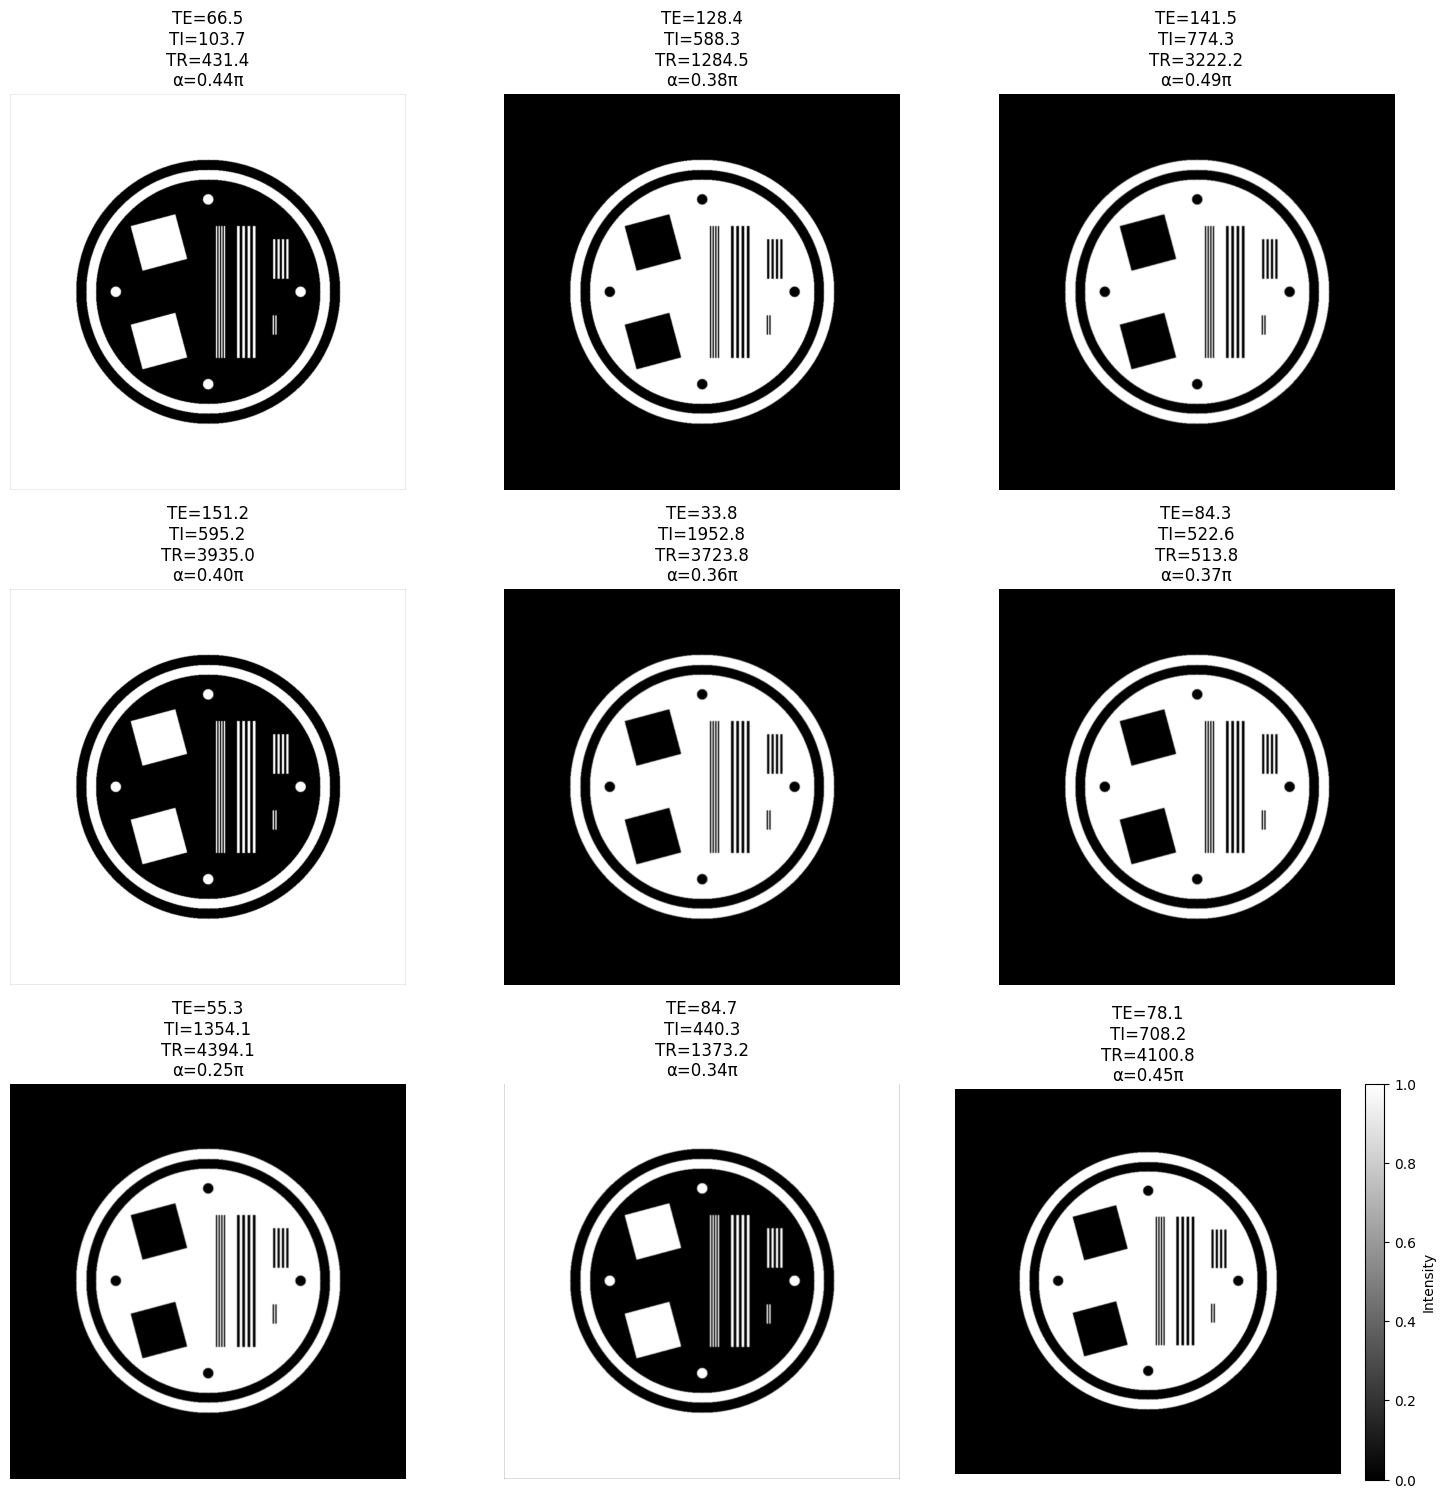

In [121]:
# Create figure with 9 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

# Base parameters
base_params = FLAIR_params.copy()

# Parameter ranges for random sampling
param_ranges = {
    'TE': (0, 200),    # Echo time range in ms
    'TI': (0, 2600), # Inversion time range in ms  
    'TR': (0, 6000), # Repetition time range in ms
    'alpha': (np.pi/4, np.pi/2) # Flip angle range in radians
}

# Generate 9 random parameter combinations
for i in range(9):
    # Randomly sample parameters
    params = base_params.copy()
    params['TE'] = float(torch.empty(1).uniform_(*param_ranges['TE']))
    params['TI'] = float(torch.empty(1).uniform_(*param_ranges['TI'])) 
    params['TR'] = float(torch.empty(1).uniform_(*param_ranges['TR']))
    params['alpha'] = float(torch.empty(1).uniform_(*param_ranges['alpha']))
    
    # Calculate synthetic image
    synth_img = calculate_ir_signal(**params)
    
    # Normalize image
    synth_img = (synth_img - torch.min(synth_img)) / (torch.max(synth_img) - torch.min(synth_img))
    
    # Get 2D slice and flip
    img_slice = torch.flip(synth_img[:,100,:], [1]).T
    
    # Create Gaussian kernel
    base_sigma = torch.empty(1).uniform_(0.2, 0.5).item()
    anisotropy_xy = torch.empty(1).uniform_(0.5, 1.5).item()
    sigma = (base_sigma, base_sigma * anisotropy_xy)
    
    # Create 2D Gaussian kernel
    kernel_size = 5
    x = torch.arange(-(kernel_size//2), kernel_size//2 + 1).float()
    y = torch.arange(-(kernel_size//2), kernel_size//2 + 1).float()
    xx, yy = torch.meshgrid(x, y, indexing='ij')
    gaussian_kernel = torch.exp(-(xx**2/(2*sigma[0]**2) + yy**2/(2*sigma[1]**2)))
    gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()
    
    # Create Lorentzian kernel
    gamma = torch.empty(1).uniform_(0.2, 0.5).item()
    lorentzian_kernel = 1 / (1 + (xx**2 + yy**2)/(gamma**2))
    lorentzian_kernel = lorentzian_kernel / lorentzian_kernel.sum()
    
    # Combine kernels through convolution
    combined_kernel = torch.nn.functional.conv2d(gaussian_kernel.unsqueeze(0).unsqueeze(0).float(),
        gaussian_kernel.unsqueeze(0).unsqueeze(0).float(),
        padding=kernel_size//2
    ).squeeze()
    # Apply second convolution with Lorentzian kernel
    combined_kernel = torch.nn.functional.conv2d(combined_kernel.unsqueeze(0).unsqueeze(0).float(),
        lorentzian_kernel.unsqueeze(0).unsqueeze(0).float(),
        padding=kernel_size//2
    ).squeeze()
    combined_kernel = combined_kernel / combined_kernel.sum()
    # Apply combined kernel
    img_slice = img_slice.unsqueeze(0).unsqueeze(0)
    filtered_img = torch.nn.functional.conv2d(
        img_slice.double(), 
        combined_kernel.unsqueeze(0).unsqueeze(0).double(),
        padding=kernel_size//2
    ).squeeze()
    # Renormalize
    filtered_img = (filtered_img - filtered_img.min()) / (filtered_img.max() - filtered_img.min())
    
    # Plot filtered image
    axes[i].imshow(filtered_img.cpu().numpy(), cmap='gray')
    axes[i].set_title(f'TE={params["TE"]:.1f}\nTI={params["TI"]:.1f}\nTR={params["TR"]:.1f}\nα={params["alpha"]/np.pi:.2f}π')
    axes[i].axis('off')

plt.tight_layout()
plt.colorbar(axes[i].imshow(filtered_img.cpu().numpy(), cmap='gray'), ax=axes[i], label='Intensity')
plt.show()
# Save the figure
# plt.savefig('images/flair_parameter_variations.png', bbox_inches='tight', dpi=300)sT2w